**Note! This notebook contains interactive maps that can only be viewed by proceeding to https://nbviewer.jupyter.org/ and entering the notebook url.**

# Gender

Since the creation of the modern Olympic Games, women have engaged in a long, hard-fought battle for equality, both in and outside of the games. Throghout the past 124 years, women have achieved countless victories from suffrage to reproductive rights, equal pay to increased representation in all sectors of society. While constantly under fire, these rights represent the progress and evolution of our society, although we still have so far to go. The Olympic Games mirror and represent much of this progress, as I hope to illuminate in the following exploration. Just this year, the International Olympic Committee announced their goal to achieve 50% female participation in the games, a lnadmark goal that represents this ongoing work and dedication to gender equality.

In the following section we will explore the following questions:
- What is the overall gender composition of the Olympic Games?
- Are height, weight, and age of male and female athletes substantially different?
- How has the proportion of male and female athletes changed over time?
- Which countries boast the greatest gender equality based on female participation?
- Can we predict an athlete's gender based on their height, weight, and age?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_data.csv')

## What is the overall gender composition of the Olympic Games?

In [3]:
male_data = data[data.Sex=='M']
female_data = data[data.Sex=='F']

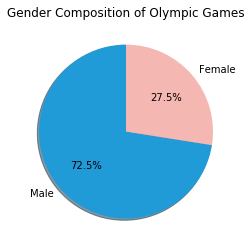

In [4]:
pie_slices = []
pie_slices.append(len(male_data)/len(data))
pie_slices.append(len(female_data)/len(data))
labels = ['Male','Female']
plt.pie(pie_slices, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#219AD8','#F5B7B1'])
plt.title('Gender Composition of Olympic Games')
plt.show()

The pie chart above illustrates male and female composition across all modern Olympic Games. As is evident, male athletes far outweigh female representation, with 72.5% male athletes and only 27.5% female. However, this visualization represents athletes since 1896, and, with the progress made since then, hopefully we can show increased equality in representation throughout the remainder of the section.

In [5]:
male_data.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,196594.000000,196594.000000,196594.000000,196594.000000,196594.000000,196594.000000
mean,134259.785065,67601.598304,26.172716,178.896640,75.254759,1973.046064
std,78288.679740,39036.820069,6.342165,7.999185,11.234671,31.127867
min,0.000000,1.000000,10.000000,127.000000,28.000000,1896.000000
25%,66209.250000,33868.250000,22.000000,175.000000,70.000000,1952.000000
50%,133625.000000,67271.500000,25.000000,179.000000,74.000000,1980.000000
75%,202346.750000,101638.000000,29.000000,183.000000,79.000000,2000.000000
max,271115.000000,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
female_data.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,74522.000000,74522.000000,74522.000000,74522.000000,74522.000000,74522.000000
mean,138980.958442,69956.722887,23.734401,167.855103,59.915032,1992.445748
std,78098.126752,38932.561177,5.778777,8.347283,9.671605,20.458993
min,4.000000,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,71837.000000,36558.500000,20.000000,163.000000,55.000000,1984.000000
50%,139659.000000,70128.000000,23.000000,168.000000,59.000000,1998.000000
75%,206265.750000,103534.750000,27.000000,173.000000,65.000000,2008.000000
max,271110.000000,135568.000000,74.000000,213.000000,167.000000,2016.000000


From the descriptive data above, we notice the following trends and observations:
- 196,954 male athletes and 74,522 female athletes total
- The average male age is approximately 26 years. The average female age is nearly 24 years.
- Average male height (179 cm) is 11 cm greater than average female height (168 cm).
- Average male weight (75 kg) is 15 kg greated than average female weight (60 kg).
- The shortest male and female athletes are both 127 cm.
- The tallest male and female atheletes are 226 cm and 213 cm, respectively.
- The lightest male and female athletes are 28 kg and 25 kg, respectively.
- The heaviest male and female athletes are 214 kg and 167 kg, respectively.
- Over 75% of male and female athletes are under the age of 30.
- The oldest Olympic athletes have been a 97 year old man and 74 year old woman.

## Are the height, weight, and age of male and female athletes substantially different?

Due to the substantial presence of missing values for height, weight, and age in our Introduction section, we create new dataframes below that remove rows with these missing values, to avoid distributions that do not truly represent the data. Then, we will explore whether significant differences truly exist between male and female athletes with regards to height, weight, and age.

In [7]:
nonnull_data = pd.read_csv('athlete_events.csv')
nonnull_data.Medal.fillna("None",inplace=True)
nonnull_age = nonnull_data.drop(nonnull_data[nonnull_data['Age'].isna()==True].index)
nonnull_weight = nonnull_data.drop(nonnull_data[nonnull_data['Weight'].isna()==True].index)
nonnull_height = nonnull_data.drop(nonnull_data[nonnull_data['Height'].isna()==True].index)

nonnull_male_age = nonnull_age[nonnull_age.Sex == 'M']
nonnull_female_age = nonnull_age[nonnull_age.Sex == 'F']

nonnull_male_height = nonnull_height[nonnull_height.Sex == 'M']
nonnull_female_height = nonnull_height[nonnull_height.Sex == 'F']

nonnull_male_weight = nonnull_weight[nonnull_weight.Sex == 'M']
nonnull_female_weight = nonnull_weight[nonnull_weight.Sex == 'F']

### Weight Difference

#### Ho (null hypothesis): A significant difference does **not** exist between male and female weight.
#### Ha (alternate hypothesis): A significant difference **does** exist between male and female weight.

Below, the weight distribution for gender illustrates that male weight is shifted slightly higher than female weight. Male weight appears to have a greater spread than female weight, although with some high outliers for both genders.

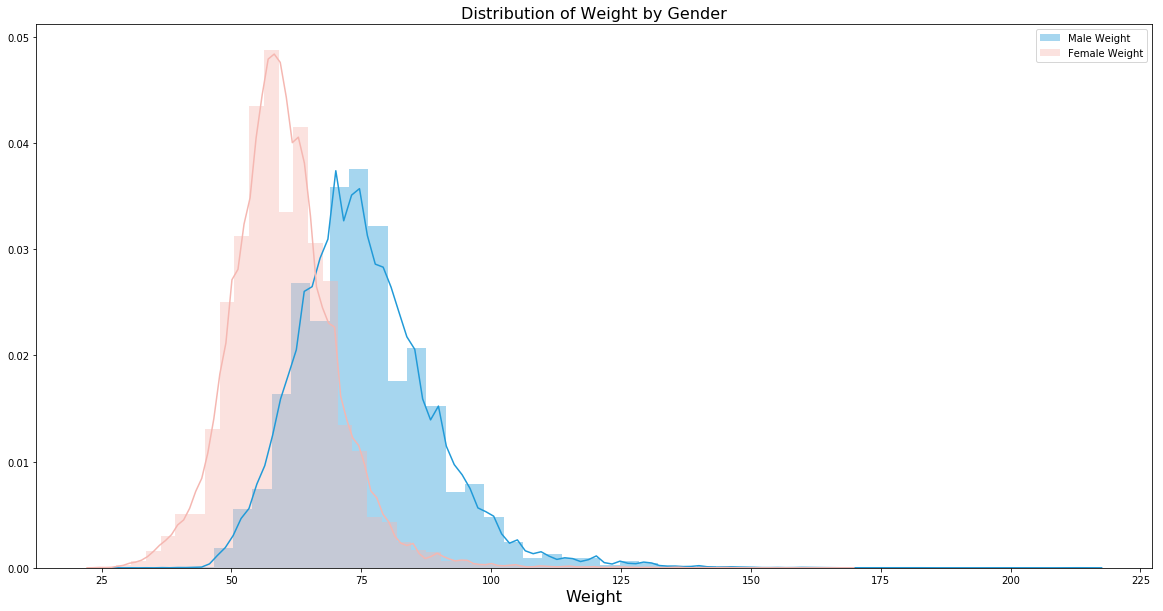

In [8]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_male_weight['Weight'], label='Male Weight', color='#219AD8')
sns.distplot(nonnull_female_weight['Weight'], label='Female Weight', color='#F5B7B1')
plt.title('Distribution of Weight by Gender', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [9]:
from scipy import stats
print('Normality of male weight distribution: ', stats.normaltest(nonnull_male_weight.Weight))
print('Normality of female weight distribution: ', stats.normaltest(nonnull_female_weight.Weight))

Normality of male weight distribution:  NormaltestResult(statistic=27017.508174701405, pvalue=0.0)
Normality of female weight distribution:  NormaltestResult(statistic=14405.956261432964, pvalue=0.0)


In [47]:
print(len(nonnull_male_weight.Weight))
print(len(nonnull_female_weight.Weight))

141470
66771


With p-values under 0.05 for the normal test, niether distribution can be claimed as normal. However, due to the high number of samples in both datasets (over 65,000 in both!), we can proceed comfortably with a two-sample t-test to evaluate the siginficance of the difference in their means.

In [11]:
np.var(nonnull_male_weight['Weight']) == np.var(nonnull_female_weight['Weight'])

False

In [13]:
print('T-Test Results for difference in male and female height:',
      stats.ttest_ind(nonnull_male_weight['Weight'], nonnull_female_weight['Weight'], equal_var=False))

T-Test Results for difference in male and female height: Ttest_indResult(statistic=297.35363114553485, pvalue=0.0)


The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between male and female weight. Next, we will explore the extent of this significant difference.

Text(0.5, 1.0, 'Average Weight by Gender')

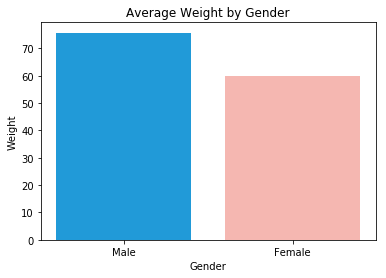

In [15]:
x = ['Male', 'Female']
y = [np.array(nonnull_male_weight.Weight).mean(),np.array(nonnull_female_weight.Weight).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.title('Average Weight by Gender')

In [16]:
print('Average Male Weight',np.array(nonnull_male_weight.Weight).mean())
print('Average Female Weight',np.array(nonnull_female_weight.Weight).mean())
print('Difference in Means',np.array(nonnull_male_weight.Weight).mean()-np.array(nonnull_female_weight.Weight).mean())

Average Male Weight 75.74367710468651
Average Female Weight 60.021251741025296
Difference in Means 15.722425363661216


In [17]:
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [18]:
Cohen_d(np.array(nonnull_male_weight.Weight),np.array(nonnull_female_weight.Weight))

1.2751815026682798

With a difference in mean weight of 15.72 kg, the distributions for male and female weight lie 1.275 standard deviations apart, allowing us to claim a **large** effect size in the weight difference. Male and female athlete weight are indeed significantly different to a large extent!

### Height Difference

#### Ho (null hypothesis): A significant difference does **not** exist between male and female height.
#### Ha (alternate hypothesis): A significant difference **does** exist between male and female height.

Below, the height distribution for gender illustrates that male height is shifted slightly higher than female height, similar to the distributions for weight. Again, male height appears to have a greater spread than female height, although with some high and low outliers for both genders.

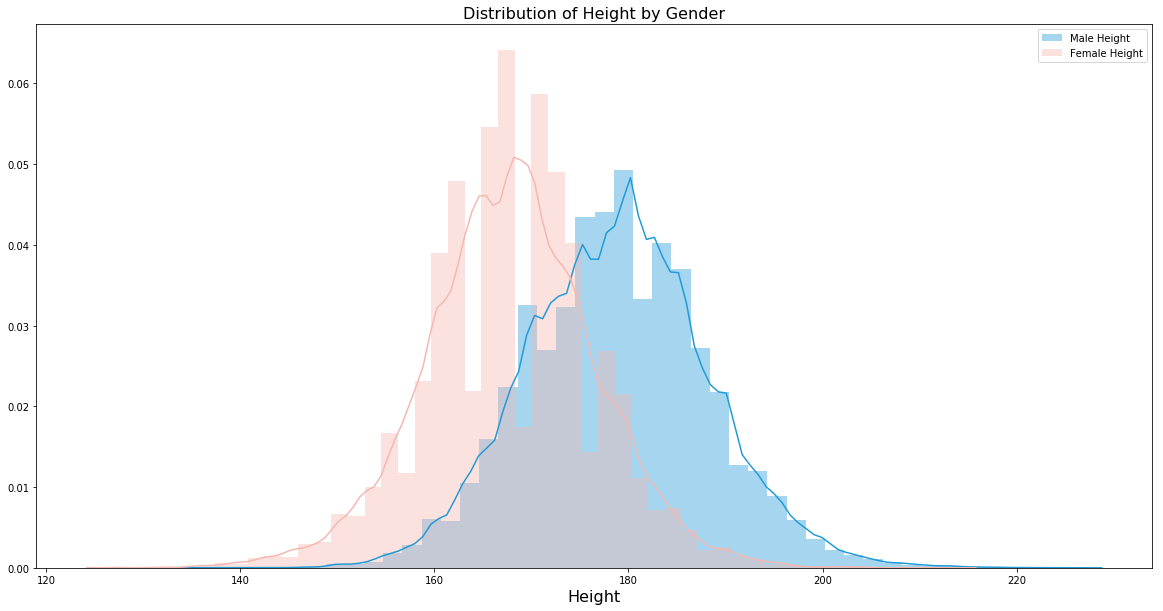

In [19]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_male_height['Height'], label='Male Height', color='#219AD8')
sns.distplot(nonnull_female_height['Height'], label='Female Height', color='#F5B7B1')
plt.title('Distribution of Height by Gender', fontsize=16)
plt.xlabel('Height', fontsize=16)
plt.legend()
plt.show()

In [20]:
print('Normality of male height distribution: ', stats.normaltest(male_data.Height))
print('Normality of female height distribution: ', stats.normaltest(female_data.Height))

Normality of male height distribution:  NormaltestResult(statistic=6950.097580350797, pvalue=0.0)
Normality of female height distribution:  NormaltestResult(statistic=1329.543457816336, pvalue=1.9647459847368126e-289)


In [48]:
print(len(nonnull_male_height.Height))
print(len(nonnull_female_height.Height))

143567
67378


With p-values under 0.05 for the normal test, niether distribution can be claimed as normal. However, due to the high number of samples in both datasets (over 65,000 in both!), we can proceed comfortably with a two-sample t-test to evaluate the siginficance of the difference in their means.

In [21]:
np.var(nonnull_male_height['Height']) == np.var(nonnull_female_height['Height'])

False

In [22]:
print('T-Test Results for difference in male and female height:',
      stats.ttest_ind(nonnull_male_height['Height'], nonnull_female_height['Height'], equal_var=False))

T-Test Results for difference in male and female height: Ttest_indResult(statistic=263.09653079571683, pvalue=0.0)


The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between male and female height. Next, we will explore the extent of this significant difference.

Text(0.5, 1.0, 'Average Height by Gender')

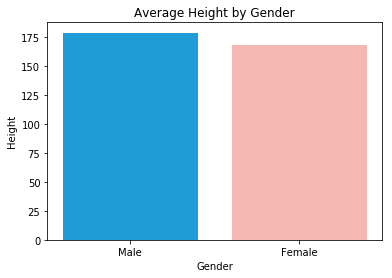

In [23]:
x = ['Male', 'Female']
y = [np.array(nonnull_male_height.Height).mean(),np.array(nonnull_female_height.Height).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Height')
plt.xlabel('Gender')
plt.title('Average Height by Gender')

In [25]:
print('Average Male Height',np.array(nonnull_male_height.Height).mean())
print('Average Female Height',np.array(nonnull_female_height.Height).mean())
print('Difference in Means',np.array(nonnull_male_height.Height).mean()-np.array(nonnull_female_height.Height).mean())

Average Male Height 178.85846329588276
Average Female Height 167.83973997447237
Difference in Means 11.018723321410391


In [24]:
Cohen_d(np.array(nonnull_male_height.Height),np.array(nonnull_female_height.Height))

1.200498727379905

With a difference in mean height of 11.02 cm, the distributions for male and female height lie 1.200 standard deviations apart, allowing us to claim a **large** effect size in the height difference. Male and female athlete height are indeed significantly different to a large extent!

### Age Difference

#### Ho (null hypothesis): A significant difference does **not** exist between male and female age.
#### Ha (alternate hypothesis): A significant difference **does** exist between male and female age.

Below, the age distribution for gender illustrates that male and female age are nearly overlapping, with male age ever so slightly shifted higher. The spread for both genders also appears more even than in the distributions for height and weight, although more high outliers for males seem to be present.

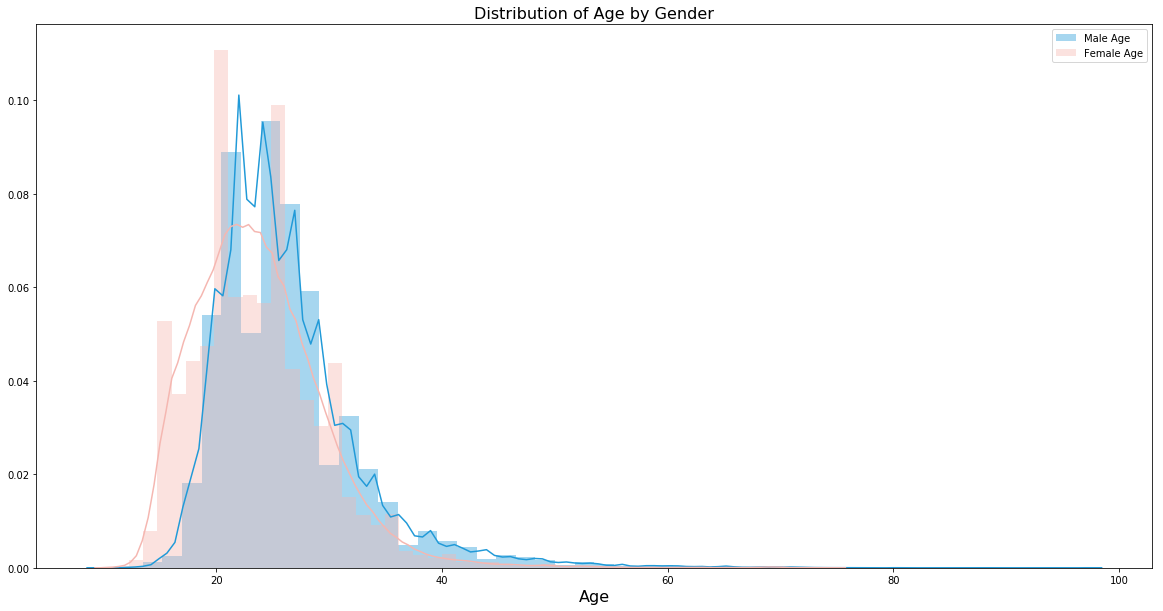

In [26]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_male_age['Age'], label='Male Age', color='#219AD8')
sns.distplot(nonnull_female_age['Age'], label='Female Age', color='#F5B7B1')
plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

In [27]:
print('Normality of male age distribution: ', stats.normaltest(male_data.Age))
print('Normality of female age distribution: ', stats.normaltest(female_data.Age))

Normality of male age distribution:  NormaltestResult(statistic=85907.65826980455, pvalue=0.0)
Normality of female age distribution:  NormaltestResult(statistic=20192.83506012879, pvalue=0.0)


In [49]:
print(len(nonnull_male_age.Age))
print(len(nonnull_female_age.Age))

187544
74098


With p-values under 0.05 for the normal test, niether distribution can be claimed as normal. However, due to the high number of samples in both datasets (over 75,000 in both!), we can proceed comfortably with a two-sample t-test to evaluate the siginficance of the difference in their means.

In [28]:
np.var(nonnull_male_age['Age']) == np.var(nonnull_female_age['Age'])

False

In [29]:
print('T-Test Results for difference in male and female age:',
      stats.ttest_ind(nonnull_male_age['Age'], nonnull_female_age['Age'], equal_var=False))

T-Test Results for difference in male and female age: Ttest_indResult(statistic=97.8145249269237, pvalue=0.0)


The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between male and female age. Next, we will explore the extent of this significant difference.

Text(0.5, 1.0, 'Average Age by Gender')

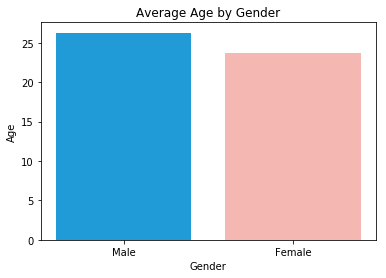

In [30]:
x = ['Male', 'Female']
y = [np.array(nonnull_male_age.Age).mean(),np.array(nonnull_female_age.Age).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Average Age by Gender')

In [31]:
print('Average Male Age',np.array(nonnull_male_age.Age).mean())
print('Average Female Height',np.array(nonnull_female_age.Age).mean())
print('Difference in Means',np.array(nonnull_male_age.Age).mean()-np.array(nonnull_female_age.Age).mean())

Average Male Age 26.277561532227104
Average Female Height 23.732880779508218
Difference in Means 2.544680752718886


In [32]:
Cohen_d(np.array(nonnull_male_age.Age),np.array(nonnull_female_age.Age))

0.40456555767392255

With a difference in mean age of 2.54 years, the distributions for male and female age lie 0.405 standard deviations apart, allowing us to claim a **small** effect size in the age difference. Male and female athlete age are indeed significantly different, but only to a small extent!

## How has the proportion of male and female athletes changed over time?

Although the full history of the modern Olympic Games has 1/3 as many female as male athletes, let's determine if the gender composition of the games has truly changed over time. First, we'll reorganize the data a bit to prepare for our visualization.

In [30]:
to_graph = data[['Year','Sex']]

In [31]:
to_graph = pd.get_dummies(to_graph)

In [32]:
len(to_graph)

271116

In [33]:
to_graph = to_graph.groupby(['Year']).sum()

In [34]:
to_graph.reset_index(inplace=True)

In [38]:
to_graph

,Year,Sex_F,Sex_M
0,1896,0.0,380.0
1,1900,33.0,1903.0
2,1904,16.0,1285.0
3,1906,11.0,1722.0
4,1908,47.0,3054.0
5,1912,87.0,3953.0
6,1920,134.0,4158.0
7,1924,261.0,5432.0
8,1928,437.0,5137.0
9,1932,369.0,2952.0


With a total count of female and male athletes for each year of the modern Olympic Games, we'll create a bar graph below that illustrates how this composition has shifted over time.

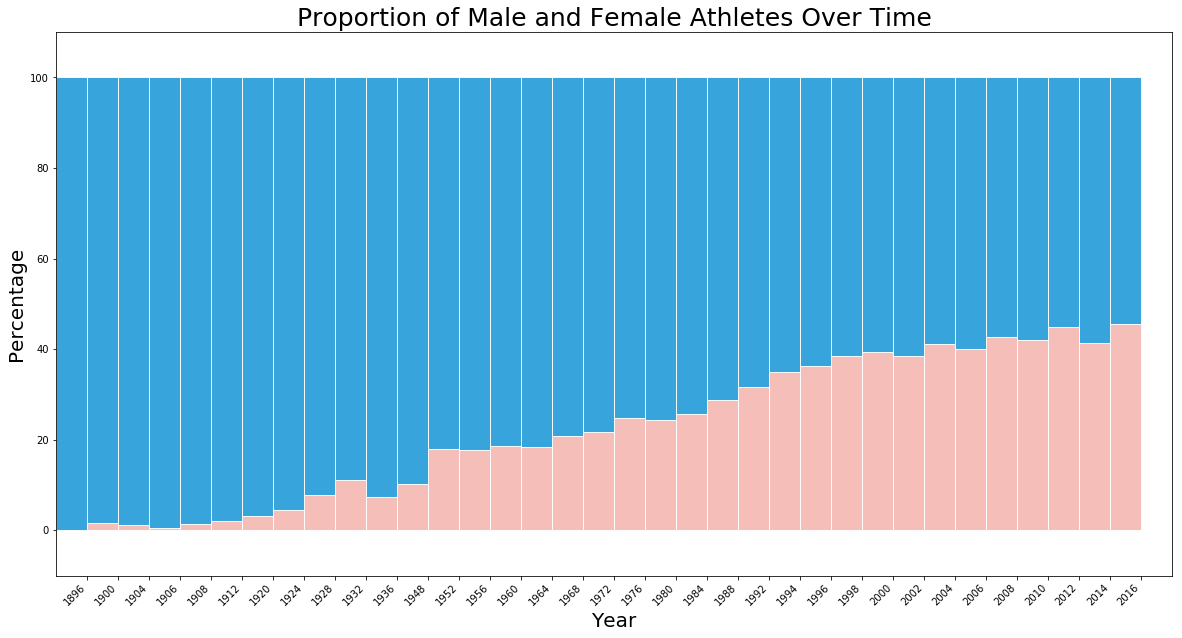

In [37]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(to_graph['Sex_F']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(to_graph['Sex_F'], to_graph['Sex_M'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(to_graph['Sex_F'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(to_graph['Sex_M'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l,pre_rel,label='Females', alpha=0.9, color='#F5B7B1',width=bar_width,edgecolor='white')

# Create a bar chart in position bar_1
ax.bar(bar_l,post_rel,bottom=pre_rel,label='Males',alpha=0.9,color='#219AD8',width=bar_width,edgecolor='white')

# Set the ticks to be first names
plt.xticks(tick_pos, to_graph['Year'])
ax.set_ylabel("Percentage",size=20)
ax.set_xlabel("Year",size=20)
plt.title('Proportion of Male and Female Athletes Over Time',size=25)

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

As the barplot above illuminates, female participation in the games truly has increased throughout Olympic history. Some dips in the percentage of female athletes are present throughout the past 124 years, but overall the graph shows a trend of increased female composition. Although not quite yet at an even 50/50 split, the IOC's recent announcement setting the goal to reach this benchmark may finally make this possible!

Text(0.5, 1.0, 'Distribution of Male and Female Athletes Over Time')

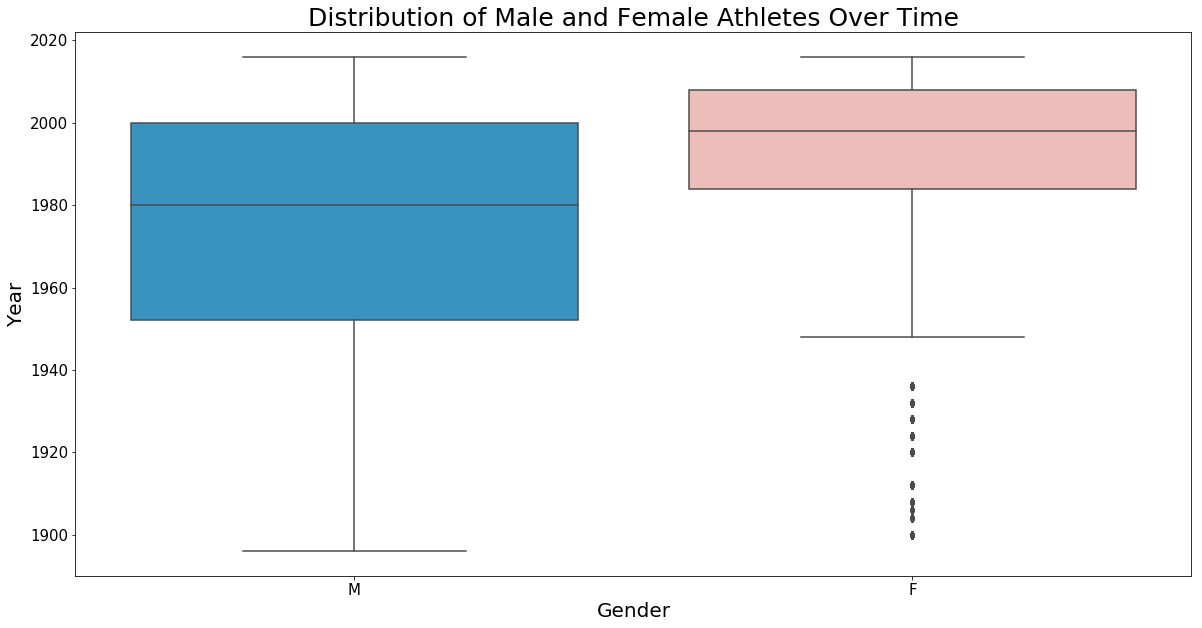

In [55]:
plt.figure(figsize=(20, 10))
my_pal={"M":'#219AD8',"F":'#F5B7B1'}
sns.boxplot(x="Sex", y="Year", data=data, palette=my_pal)
plt.xlabel('Gender',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Year',size=20)
plt.title('Distribution of Male and Female Athletes Over Time',size=25)

The boxplot above highlights that female athletes are considered outliers in the Olympic Games until approximately 1952. Since then, nearly 75% of female athletes did not participate until after 1984. While the male distribution demonstrates that some of this is normal, as the size of the games has increased over time. However, based upon the differences in distributions, it remains clear that women have had to fight much harder to participate in the games. However, the perseverance and dedication to this cause has been well worth the fight, as we observe the victory and continued success in increased gender equality at the Olympics.

## Which countries boast the greatest gender equality based on female participation?

Given the widely varying levels of gender equality and progressiveness across different countries, we can expect that differences likely exist between the amount of female athlete participation based on country. Below, we will create a dataframe for mapping that counts the total number of female and male athletes per country code. We will subseqeuntly create a dataframe that computes the proportion of each country's athletes that are female. By utilizing plotly to map this data, we will be able to visualize which countries have come the furthest in terms of gender equality at the Olympic Games.

In [56]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

First, we create a pivot table that counts the number of "F" and "M" athletes per NOC code.

In [57]:
country_gender = data.pivot_table(index='NOC', values='Name', columns='Sex', aggfunc='count')

In [58]:
country_gender.head()

Sex,F,M
NOC,,
AFG,5.0,121.0
AHO,12.0,67.0
ALB,27.0,43.0
ALG,94.0,457.0
AND,42.0,127.0


In [59]:
country_gender.isna().sum()

Sex
F    8
M    0
dtype: int64

It appears that 8 countries have never had a female athlete in the modern Olympic Games. We will fill these null values with 0 below.

In [60]:
country_gender.fillna(0,inplace=True)

In [61]:
country_codes = pd.read_csv('noc_regions.csv')

By merging our pivot table from above with the data for country codes with specified regions, we can add country names for each of our rows.

In [62]:
country_gender_final = pd.merge(country_gender, country_codes, on='NOC')

In [63]:
to_drop = ['notes']
country_gender_final.drop(to_drop, axis=1, inplace=True)

In [64]:
country_gender_final.region.value_counts().head(15)

Germany           4
Russia            3
Czech Republic    3
Serbia            3
Yemen             3
Malaysia          3
Trinidad          2
Syria             2
Vietnam           2
Zimbabwe          2
Australia         2
Canada            2
Greece            2
China             2
Turkmenistan      1
Name: region, dtype: int64

Similar to our mapping work in another section (5. Exploring Countries), we must deal with countries that have used multiple NOC codes given shifiting politics throughout the history of the Olympic Games. Since the number of countries in this situation is fairly low (14), we will manually correct this issue by creating a single row that sums the values for each country's multiple codes, so that we can correctly map the data.

In [66]:
country_gender_final[country_gender_final.region=='Germany']

,NOC,F,M,region
70,FRG,912.0,2403.0,Germany
76,GDR,931.0,1714.0,Germany
79,GER,2999.0,6831.0,Germany
173,SAA,7.0,86.0,Germany


In [81]:
country_gender_final[country_gender_final.region=='China'].sum()

NOC           CHNHKG
F               2992
M               2834
region    ChinaChina
dtype: object

In [83]:
to_append = pd.DataFrame([['GER',4849,11034,'Germany'],
                          ['YEM',4,44, 'Yemen'],
                          ['YUG',575,2721,'Serbia'],
                          ['TCH',1603,4828, 'Czech Republic'],
                          ['RUS',4105,7587, 'Russia'],
                          ['MAS',102,475, 'Malaysia'],
                          ['GRE',655,2537, 'Greece'],
                          ['TTO',80,315, 'Trinidad'],
                          ['VIE',76,140, 'Vietnam'],
                          ['ZIM',114,209, 'Zimbabwe'],
                          ['AUS',2751,4973, 'Australia'],
                          ['SYR',17,262, 'Syria'],
                          ['CAN',3563,6171, 'Canada'],
                          ['CHN',2992,2834, 'China'],
                         ], columns=['NOC','F','M','region'])

In [82]:
country_gender_map = country_gender_final.copy()

We will drop the original rows and append the new data that we created above.

In [84]:
to_drop = ['Germany','Yemen','Serbia','Czech Republic','Russia','Malaysia','Greece','Trinidad','Zimbabwe','Australia','Syria','Canada','China']
for country in to_drop:
    country_gender_map.drop(country_gender_map.index[country_gender_map['region'] == country], inplace = True)

In [85]:
country_gender_map[country_gender_map.region=='Russia']

,NOC,F,M,region


In [86]:
country_gender_map = country_gender_map.append(to_append,ignore_index=True)

In [88]:
country_gender_map.tail(15)

,NOC,F,M,region
195,ZAM,19.0,164.0,Zambia
196,GER,4849.0,11034.0,Germany
197,YEM,4.0,44.0,Yemen
198,YUG,575.0,2721.0,Serbia
199,TCH,1603.0,4828.0,Czech Republic
200,RUS,4105.0,7587.0,Russia
201,MAS,102.0,475.0,Malaysia
202,GRE,655.0,2537.0,Greece
203,TTO,80.0,315.0,Trinidad
204,VIE,76.0,140.0,Vietnam


By observing the tail of the dataframe, we can see that all of our new row were added correctly. Now, we can proceed with mapping our data!

In [93]:
country_gender_map.columns = ('NOC','Female','Male','region')

In [94]:
def create_map(data, criteria, colorscale):
    trace = go.Choropleth(
            locations = data['region'],
            locationmode='country names',
            z = data[criteria],
            text = data['region'],
            autocolorscale =False,
            reversescale = False,
            colorscale = colorscale,
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Athletes',
                tickprefix = '')
        )

    data = [trace]
    layout = go.Layout(title = 'Total {} Athletes by Country Over All Olympic Competitions'.format(criteria),
                       geo = dict(
                           showframe = True,
                           showlakes = False,
                           showcoastlines = True,
                           projection = dict(
                               type = 'natural earth'
                           )
                       )
                      )

    fig = dict( data=data, layout=layout )
    iplot(fig)

In [108]:
create_map(country_gender_map, 'Female', 'RdBu')

**In order to see the interactive map above, please proceed to https://nbviewer.jupyter.org/ and enter the url for this notebook!**

The map above displays the total number of female athletes per country throughout the history of the Olympic Games. Notable observations include:
- African and Middle Eastern nations appear to have the lowest female participation in the games.
- South American and Eastern European nations have slightly more than the former mentioned regions but still much lower than average.
- The United States boasts the greatest number of female athletes at 5533.
- Russia, Germany, the UK, and Canada follow the United States' lead, all with high numbers of female athletes.
- Given their high standing in other areas of our analysis, China, Australia, Japan, France, and many other Western European nations remain relatively low with regards to the number of female athletes.

Next, we will create another dataframe for mapping that computes the proportion of a country's athletes that are female. Given the differing sizes of nations, this will allow us to more accurately visualize how country's compare in their gender equality, without allowing countries such as the US to outrank other countries based simply on sheer size.

In [97]:
prop_gender_map = country_gender_map.copy()

In [100]:
prop_gender_map['Total'] = prop_gender_map.Female+prop_gender_map.Male

In [102]:
prop_gender_map['Proportion Female'] = prop_gender_map.Female/prop_gender_map.Total

In [103]:
prop_gender_map['Proportion Male'] = prop_gender_map.Male/prop_gender_map.Total

In [107]:
create_map(prop_gender_map, 'Proportion Female', 'RdBu')

Based on our map of the proportion of female athletes per country, we notice the following trends:
- China, Angola, Ukraine, Belarus, Madagascar, Kazakhstan, and Vietnam all rise to top with over 40% female athletes.
- The Middle East clearly falls to the bottom, with the lowest proportion of female athletes.
- Many North and East African nations follow a similar trend as the Middle East, though we decreased severity.
- The nations that appeared most impressive in our previous map (United States, Russia, the UK, Canada) fall slightly here, with decreased percentages of female athletes.
- Western European nations still surprisingly show lower than expected (given their typical progressiveness) proportions of female athletes.

## Can we predict an athlete's gender based on their height, weight, and age?

According to our work above, signficant differences exist between male and female atheletes' height, weight, and age. Below, we will attempt to create a classification model based on these features that most accurately determines whether a given athlete is male or female. We will use a KNearest neighbors classifier, logistic regression, and decision tree to perform the classification, and will compare the performance of each model accordingly.

To prepare our data for classfication, we create our features dataframe with 'Age', 'Height', and 'Weight' included, as well as our target dataframe for 'Sex'.

In [147]:
X = data[['Age','Height','Weight']].copy()

In [148]:
Y = data['Sex'].copy()

### KNearest Neighbors

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import timeit
from sklearn.metrics import confusion_matrix

In [151]:
start = timeit.timeit()
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(X_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
end = timeit.timeit()
print("Accuracy:",acc_train)
print("Accuracy:",acc_test)
print ("Time Taken:", end - start)

Accuracy: 0.8612156174232923
Accuracy: 0.8410127030496172
Time Taken: 0.0007497690003219759


With our KNearest neighbors classifier, we achieve an 86.12% training accuracy rate and an 84.10% testing accuracy rate. This is a pretty high initial benchmark, much higher than the statistical 50/50 accuracy rate we could expect with random chance. Let's visualize this in a confusion matrix below!

In [152]:
cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

[[12194  6361]
 [ 4415 44809]]


In [153]:
import itertools
def final_confusion_matrix(cnf_matrix, y, title):
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()

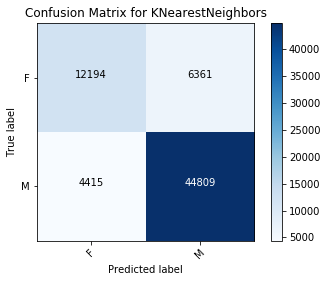

In [154]:
final_confusion_matrix(cm_knn, Y, 'KNearestNeighbors')

The confusion matrix above, shows that our model accurately predicted 12194 female athletes and 44809 male athletes! However, it misclassified 10776 total athletes, approximately 15% of the testing dataset. Let's see if our logistic regression or decision tree model can do better!

### Logistic Regression

In [155]:
Y.replace('M',0,inplace=True)
Y.replace('F',1,inplace=True)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [157]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = y_train - y_hat_train
print('Training Accuracy: ',pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test - y_hat_test
print('Testing Accuracy: ',pd.Series(residuals).value_counts(normalize=True)[0])

cm_logreg = confusion_matrix(y_test, y_hat_test)
print(cm_logreg)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy:  0.8330161259387125
Testing Accuracy:  0.8314227120494548
[[45163  3878]
 [ 7548 11190]]


With our logistic regression classifier, we achieve an 83.30% training accuracy rate and an 83.14% testing accuracy rate. This is another pretty high result, much higher than the statistical 50/50 accuracy rate we could expect with random chance, but slightly lower than the KNearest neighbors classifier from before. Let's visualize this in a confusion matrix below!

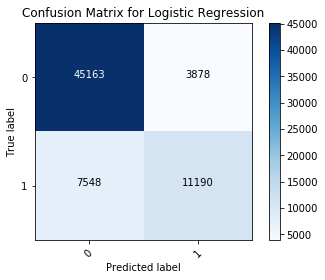

In [158]:
final_confusion_matrix(cm_logreg, Y, 'Logistic Regression')

The confusion matrix above shows that our model accurately predicted 11190 female athletes and 45163 male athletes! However, it misclassified 11426 total athletes, approximately 17% of the testing dataset. Let's see if our decision tree model can do better!

### Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print('Training Accuracy: ',accuracy_score(y_train, y_pred_dt_train))
print('Testing Accuracy: ',accuracy_score(y_test, y_pred_dt))

[[45463  3578]
 [ 6740 11998]]
Training Accuracy:  0.88216605930057
Testing Accuracy:  0.8477699582466546


With our decision tree classifier, we achieve an 88.22% training accuracy rate and an 84.78% testing accuracy rate. This is the highest of all three initial models, and much higher than the statistical 50/50 accuracy rate we could expect with random chance. Let's visualize this in a confusion matrix below!

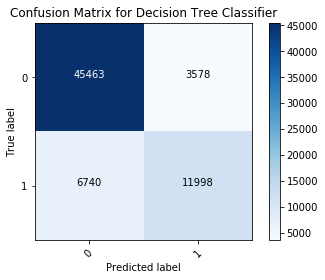

In [162]:
final_confusion_matrix(cm_dt, Y, 'Decision Tree Classifier')

The confusion matrix above shows that our model accurately predicted 11998 female athletes and 45463 male athletes! However, it misclassified 10318 total athletes, approximately 15% of the testing dataset. Let's see if our we can improve on our decision tree classifier below!

## Summary

In this section, we explored the impact, influence, and distribution of gender throughout the history of the modern Olympic Games. We answered many questions about gender, including:
- What is the overall gender composition of the Olympic Games?
- Are height, weight, and age of male and female athletes substantially different?
- How has the proportion of male and female athletes changed over time?
- Which countries boast the greatest gender equality based on female participation?
- Can we predict an athlete's gender based on their height, weight, and age?

Moving forward, I hope that we see a continued increase in the inclusion of female athletes in the Olympic Games. Since 1896, a year with 0 female participants, we have certainly come far, although the fight for gender equality still has a great deal further to go. For more news, information, and analysis about gender in the Olympic Games, check out the following sources:
- https://www.olympic.org/gender-equality
- https://stillmed.olympic.org/media/Document%20Library/OlympicOrg/News/2018/03/IOC-Gender-Equality-Report-March-2018.pdf
- https://www.pri.org/stories/2016-08-17/see-120-years-struggle-gender-equality-olympics
- https://www.olympic.org/news/ioc-is-leading-the-way-in-gender-equality
- https://www.bbc.com/news/world-41272613